In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2) 
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

warng pyCloudy config: pyCloudy works better with matplotlib Triangulation


In [2]:
NGC6741_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
NGC6884_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
NGC6886_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
NGC6881_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
H4_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/H_4_1.txt"
Hen2_447_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hen_2_447.txt"
Hu2_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hu_2_1.txt"
J900_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/J_900.txt"
M1_8_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/M_1_8.txt"
NGC2346_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2346.txt"
NGC2392_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2392.txt"
NGC3242_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_3242.txt"

In [3]:
cc = const.c.to(u.km/u.s).value
def FWHM_to_sig (FWHM_v,lam_c):
    sig_lam = (FWHM_v/ cc)*(lam_c/(2*np.sqrt(2*np.log(2))))
    return sig_lam
                

In [4]:
lam_0_6527 = 6527.1
lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545 )
lam_6545 = 6548.23
lam_6560 = 6559.58
lam_6527 = 6526.58
Vc = (1/ratio_6560)*(del_lam - (lam_6560 - lam_6545)) *cc / lam_0_6545 
del_lam_27 = (lam_0_6527 - lam_0_6545 )
Vc_27 = (1/ratio_6560)*(del_lam_27 - (lam_6527 - lam_6545)) *cc / lam_0_6545 
print('NGC 6881 = ',Vc)
print('NGC 6881 = ',Vc_27)
lam_6545 =6549
lam_6560 = 6559.86
lam_6527 = 6526.83
Vc = (1/ratio_6560)*(del_lam - (lam_6560 - lam_6545)) *cc / lam_0_6545 
del_lam_27 = (lam_0_6527 - lam_0_6545 )
Vc_27 = (1/ratio_6560)*(del_lam_27 - (lam_6527 - lam_6545)) *cc / lam_0_6545 
print('NGC 6886 = ',Vc)
print('NGC 6886 = ',Vc_27)

lam_6545 =6549.7
lam_6560 =6560.46
lam_6527 = 6527.46
Vc = (1/ratio_6560)*(del_lam - (lam_6560 - lam_6545)) *cc / lam_0_6545 
del_lam_27 = (lam_0_6527 - lam_0_6545 )
Vc_27 = (1/ratio_6560)*(del_lam_27 - (lam_6527 - lam_6545)) *cc / lam_0_6545 
print('NGC 6741 = ',Vc)
print('NGC 6741 = ',Vc_27)
lam_6545 =6548.06
lam_6560 =6559.1
lam_6527 =6526.11
Vc = (1/ratio_6560)*(del_lam - (lam_6560 - lam_6545)) *cc / lam_0_6545 
del_lam_27 = (lam_0_6527 - lam_0_6545 )
Vc_27 = (1/ratio_6560)*(del_lam_27 - (lam_6527 - lam_6545)) *cc / lam_0_6545 
print('NGC 6884 = ',Vc)
print('NGC 6884 = ',Vc_27)

NGC 6881 =  28.99274115660909
NGC 6881 =  28.99274115660909
NGC 6886 =  32.500504901487574
NGC 6886 =  32.71526594709025
NGC 6741 =  33.21637505349868
NGC 6741 =  33.21637505349868
NGC 6884 =  31.21193862785848
NGC 6884 =  31.14035161266193


In [5]:
direct = r"/home/jin/cloudy_Test/parameters"

cc = const.c.to(u.km/u.s).value
def FWHM_to_sig (FWHM_v,lam_c):
    sig_lam = (FWHM_v/ cc)*(lam_c/(2*np.sqrt(2*np.log(2))))
    return sig_lam
                

files = os.listdir(direct)

txt_files = [file for file in files if file.endswith('result.txt')]
txt_files_parameter = [file for file in files if file.endswith('params.txt')]

parameters_names = []
for file in txt_files:

    parts = file.split('_')

    if len(parts) > 1 and parts[1] == 's':
        parameters_name = parts[0] + parts[1]
    else:
        parameters_name = parts[0]
    
    parameters_names.append(parameters_name)

print(parameters_names)

['Hen2-447', 'NGC6886s', 'NGC2346', 'NGC6886', 'NGC6881', 'M1-8', 'NGC2392', 'Hu2-1s', 'H4-1', 'Hu2-1', 'NGC2392s', 'NGC6884', 'NGC3242', 'J900', 'J900s', 'NGC6741', 'NGC3242s']


In [6]:
for ii , name in enumerate(parameters_names):
    direct_r = direct + '/' + txt_files[ii]
    direct_p = direct + '/' + txt_files_parameter[ii]
    name_w = name.replace('-', '_')
    
    globals()[f'paramter_{name_w}']= pd.read_csv(direct_r,sep='\,',header=0,engine='python')
    globals()[f're_para{name_w}']= pd.read_csv(direct_p,sep='\,',header=0,engine='python')


    globals()[f'Model_lam_{name_w}'] = globals()[f'paramter_{name_w}']['Wavelength'].to_numpy()
    globals()[f'Model_flux_{name_w}'] = globals()[f'paramter_{name_w}']['Flux'].to_numpy()

    globals()[f'F_c_{name_w}'] = globals()[f'paramter_{name_w}']['Continuum_Model'].to_numpy()

    globals()[f'F_6527_{name_w}'] = globals()[f'paramter_{name_w}']['HeII_6527_Model'].to_numpy()
    globals()[f'F_6545_{name_w}'] = globals()[f'paramter_{name_w}']['Raman_HeII_6545_Model'].to_numpy()   

    globals()[f'F_6560_{name_w}'] = globals()[f'paramter_{name_w}']['He_6560_Model'].to_numpy()
    globals()[f'F_6563_{name_w}'] = globals()[f'paramter_{name_w}']['Ha_6563_Model'].to_numpy()
    globals()[f'F_6548_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_1_Model'].to_numpy()
    globals()[f'F_6548_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_2_Model'].to_numpy()

    globals()[f'F_6584_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_1_Model'].to_numpy()
    globals()[f'F_6584_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_2_Model'].to_numpy()

    globals()[f'F_6527_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[0]
    globals()[f'F_6545_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[1]   

    globals()[f'F_6560_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[2]
    globals()[f'F_6563_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[3]
    globals()[f'F_6548_1_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[4]
    globals()[f'F_6548_2_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[5]

    globals()[f'F_6584_1_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[6]
    globals()[f'F_6584_2_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[7]


    
    globals()[f'F_6527_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[0]
    globals()[f'F_6545_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[1]  

    globals()[f'F_6560_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[2]
    globals()[f'F_6563_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[3]
    globals()[f'F_6548_1_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[4]
    globals()[f'F_6548_2_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[5]

    globals()[f'F_6584_1_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[6]
    globals()[f'F_6584_2_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[7]


NGC 6741 condition 1

15.400000000000546
Condition 1 RCE of ratio is  0.20564580476647568
Condition 4 RCE of ratio is  0.28037633184574223
15.400000000000546


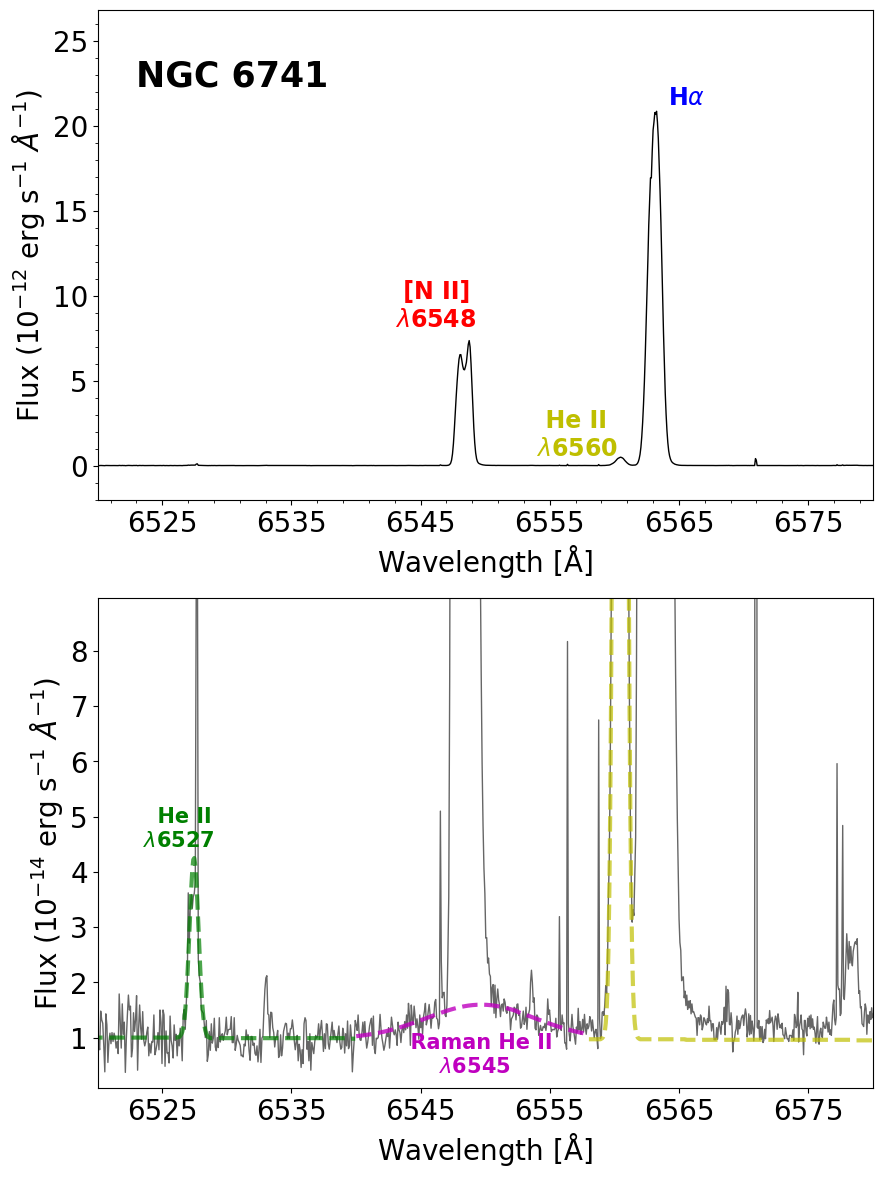

In [7]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'NGC6741'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

# path = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
# header = ['lambda', 'flux']
# Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
# lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()
# plt.plot(lam,flux)

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] +globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.4,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.4,lw=2)


F_6545_con_1 =6.16E-15 *1e12
F_6545_con_4 = 1.86E-14 *1e12

lam_6545_con_1 = 6549.7
lam_6545_con_4 =6548.64

FWHM_6545_con_1 = 457.08
FWHM_6545_con_4 = 206.42

F_6545_con_1_sigma = FWHM_to_sig(FWHM_6545_con_1,lam_6545_con_1)
F_6545_con_4_sigma = FWHM_to_sig(FWHM_6545_con_4,lam_6545_con_4)

fit_6545_con_1 = Data_R_Flux(F_6545_con_1,globals()[f'Model_lam_{name}'],lam_6545_con_1,F_6545_con_1_sigma, globals()[f'F_c_{name}'])
fit_6545_con_4 = Data_R_Flux(F_6545_con_4,globals()[f'Model_lam_{name}'],lam_6545_con_4,F_6545_con_4_sigma, globals()[f'F_c_{name}'])
lam_6560 =6560.46
# x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]
# plt.plot(globals()[f'Model_lam_{name}'],fit_6545_con_1,'m--',alpha=0.4,lw=3)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

# x_p = np.argmax(globals()[f'F_6584_1_{name}'])
# y_label = globals()[f'F_6584_1_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')


lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=20)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-2,globals()[f'F_6563_{name}'].max()*1.2)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
# plt.vlines(lam_6560,-10,globals()[f'F_6563_{name}'].max()*1.5,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,-10,globals()[f'F_6563_{name}'].max()*1.5,colors='royalblue',linestyles='-.')

plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.0,'NGC 6741',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6540)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.7,lw=3)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)

x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6540))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545],fit_6545_con_1[x_6545]*factor,'m--',alpha=0.8,lw=3)



plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')

# Noise_level =globals()[f'F_c_{name}'] + (7.02e-15 * 1e12 *factor )
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )

plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=20)
plt.ylim(1e-3,5*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)

F_6545_con_1 =6.16E-15 
F_6545_con_4 = 1.86E-14 

lam_6545_con_1 = 6549.7
lam_6545_con_4 =6548.64

FWHM_6545_con_1 = 457.08
FWHM_6545_con_4 = 206.42

F_6545_con_1_sigma = FWHM_to_sig(FWHM_6545_con_1,lam_6545_con_1)
F_6545_con_4_sigma = FWHM_to_sig(FWHM_6545_con_4,lam_6545_con_4)

F_6560 = 4.85e-13
F_6560_sig = FWHM_to_sig(34.94782397,6560.46)
lam_6560 =6560.46
RCE_1 = 1.24 * (F_6545_con_1_sigma*F_6545_con_1) / (F_6560*F_6560_sig )


print('Condition 1 RCE of ratio is ',RCE_1)

RCE_4 = 1.24 * (F_6545_con_4_sigma*F_6545_con_4) / (F_6560*F_6560_sig )


print('Condition 4 RCE of ratio is ',RCE_4)
lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)

Fc = globals()[f'F_c_{name}'].mean()
# plt.vlines(lam_6560,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
plt.ylim(Fc*0.1,globals()[f'F_6527_{name}'].max()*2 + Fc*0.5)
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_R.png',bbox_inches='tight')

NGC 6881

15.400000000000546
Condition 1 RCE of ratio is  0.36907965078236377
Condition 4 RCE of ratio is  0.38964569900969676
15.400000000000546


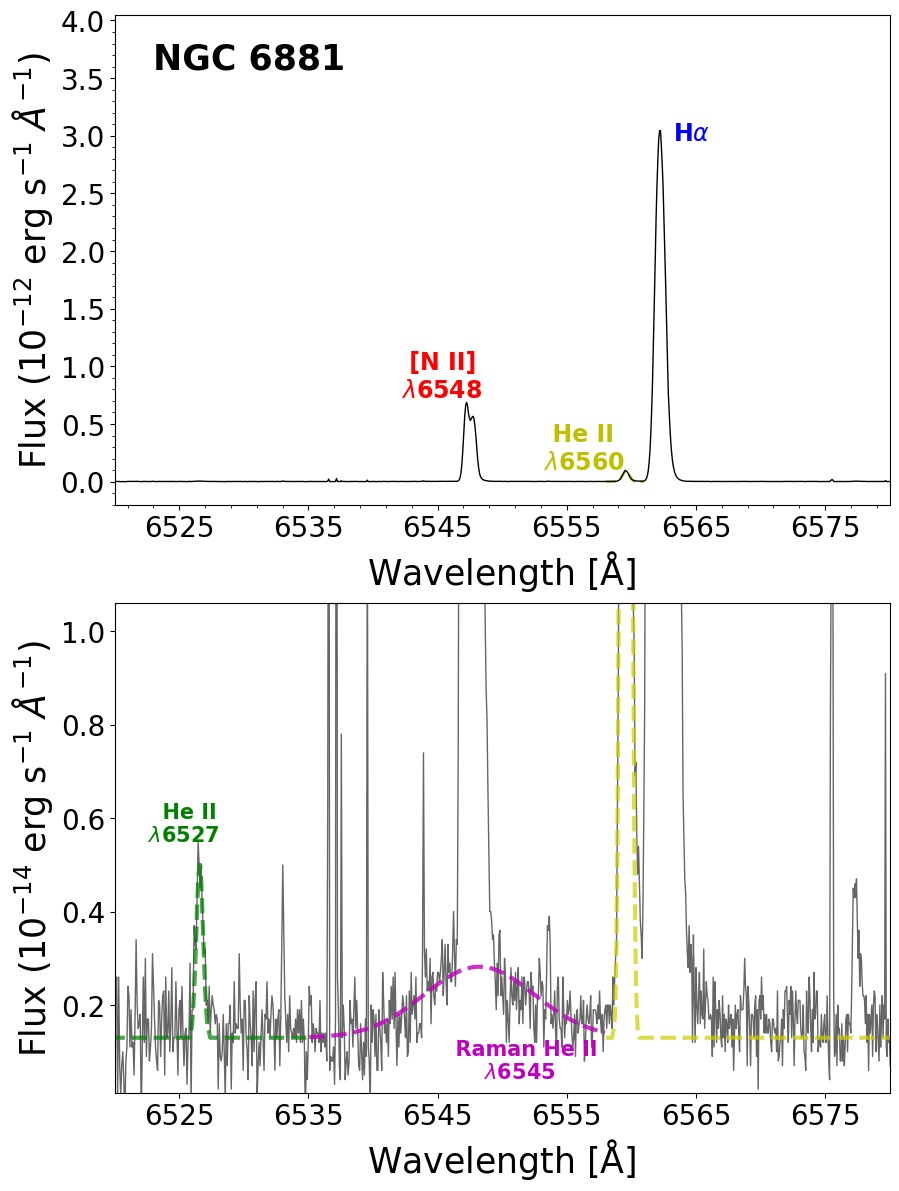

In [8]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'NGC6881'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] +globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.4,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6561))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.9,lw=2)

F_6560 = 8.99E-14
lam_6560 = 6559.58
FWHM_6560 = 24.74490655
F_6560_sig = FWHM_to_sig(FWHM_6560,lam_6560)

F_6545_con_1 =1.31E-15 *1e12
F_6545_con_4 = 1.52E-15 *1e12

lam_6545_con_1 = 6548.45
lam_6545_con_4 =6548.23

FWHM_6545_con_1 = 506.3025878
FWHM_6545_con_4 = 460.6830477


F_6545_con_1_sigma = FWHM_to_sig(FWHM_6545_con_1,lam_6545_con_1)
F_6545_con_4_sigma = FWHM_to_sig(FWHM_6545_con_4,lam_6545_con_4)

fit_6545_con_1 = Data_R_Flux(F_6545_con_1,globals()[f'Model_lam_{name}'],lam_6545_con_1,F_6545_con_1_sigma, globals()[f'F_c_{name}'])
fit_6545_con_4 = Data_R_Flux(F_6545_con_4,globals()[f'Model_lam_{name}'],lam_6545_con_4,F_6545_con_4_sigma, globals()[f'F_c_{name}'])

# x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]
# plt.plot(globals()[f'Model_lam_{name}'],fit_6545_con_4,'m--',alpha=0.6,lw=3)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

# x_p = np.argmax(globals()[f'F_6584_1_{name}'])
# y_label = globals()[f'F_6584_1_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')



lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)

Fc = globals()[f'F_c_{name}'].mean()
# plt.vlines(lam_6560,-10,100,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,-10,100,colors='royalblue',linestyles='-.')
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.2,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,'NGC 6881',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.7,lw=3)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,color='#CCCC00',linestyle='--',alpha=0.7,lw=3)


x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]

plt.plot(globals()[f'Model_lam_{name}'][x_6545],fit_6545_con_4[x_6545]*factor,'m--',alpha=0.8,lw=3)


# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.9,lw=1)


x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.1),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')

x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-2.0,y_label*(0.35),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')



# Noise_level =globals()[f'F_c_{name}'] + (1.79e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(1e-3,3*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)



RCE_1 = 1.24 * (F_6545_con_1_sigma*F_6545_con_1/1e12) / (F_6560*F_6560_sig )


print('Condition 1 RCE of ratio is ',RCE_1)

RCE_4 = 1.24 * (F_6545_con_4_sigma*F_6545_con_4/1e12) / (F_6560*F_6560_sig )


print('Condition 4 RCE of ratio is ',RCE_4)
lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)

Fc = globals()[f'F_c_{name}'].mean()
# plt.vlines(lam_6560,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
plt.ylim(Fc*0.1,globals()[f'F_6527_{name}'].max()*2 + Fc*0.5)

plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_R.png',bbox_inches='tight')

NGC 6884

15.400000000000546
Condition 1 RCE of ratio is  0.06308528155616211
Condition 4 RCE of ratio is  0.07308483748245889
15.400000000000546


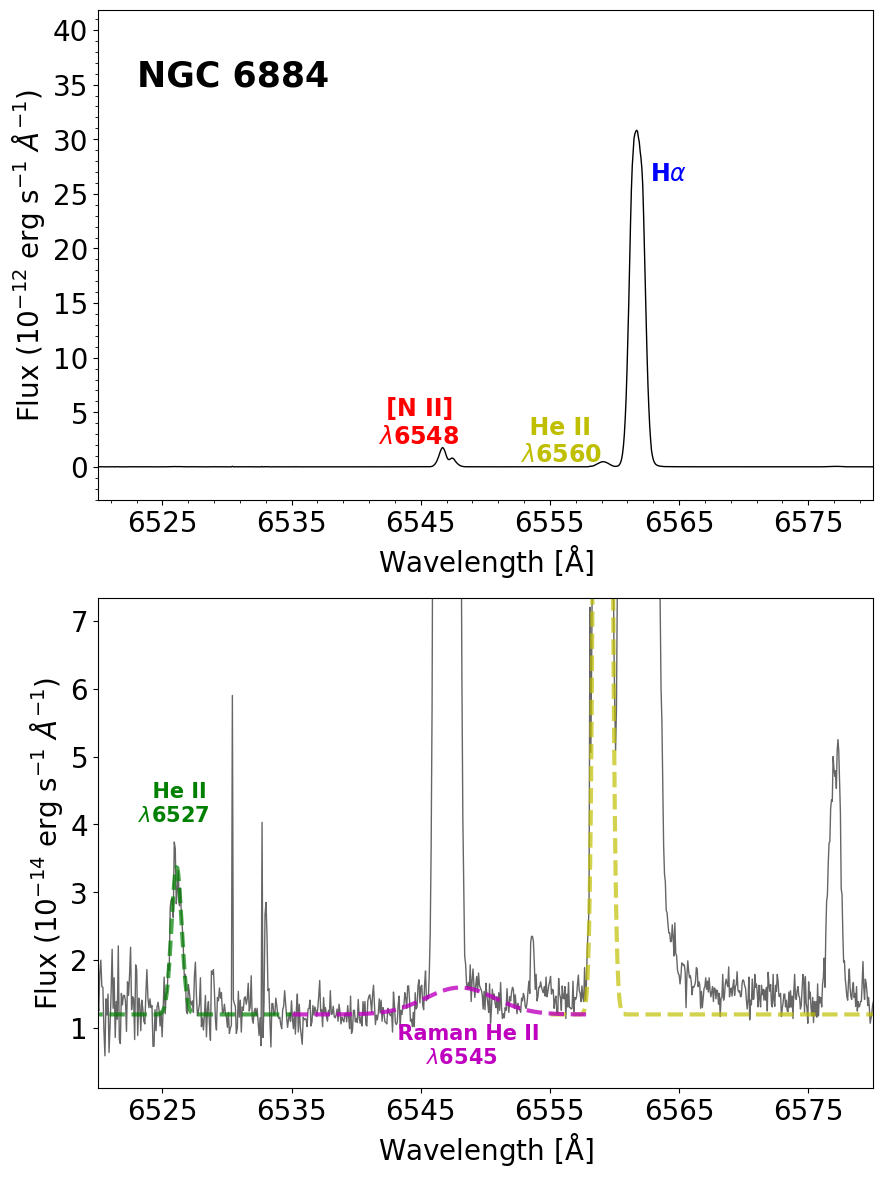

In [9]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'NGC6884'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] +globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)

F_6560 =4.87E-13
lam_6560 =6559.1
FWHM_6560 = 39.86665775
F_6560_sig = FWHM_to_sig(FWHM_6560,lam_6560)

F_6545_con_1 =3.16E-15 *1e12
F_6545_con_4 = 3.96E-15 *1e12

lam_6545_con_1 = 6548.56
lam_6545_con_4 =6548.06

FWHM_6545_con_1 =313.0808528
FWHM_6545_con_4 = 289.4548331

F_6545_con_1_sigma = FWHM_to_sig(FWHM_6545_con_1,lam_6545_con_1)
F_6545_con_4_sigma = FWHM_to_sig(FWHM_6545_con_4,lam_6545_con_4)

fit_6545_con_1 = Data_R_Flux(F_6545_con_1,globals()[f'Model_lam_{name}'],lam_6545_con_1,F_6545_con_1_sigma, globals()[f'F_c_{name}'])
fit_6545_con_4 = Data_R_Flux(F_6545_con_4,globals()[f'Model_lam_{name}'],lam_6545_con_4,F_6545_con_4_sigma, globals()[f'F_c_{name}'])

# x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]
# plt.plot(globals()[f'Model_lam_{name}'],fit_6545_con_4,'m--',alpha=0.4,lw=3)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(0.9),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.75),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

# x_p = np.argmax(globals()[f'F_6584_1_{name}'])
# y_label = globals()[f'F_6584_1_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')


lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)

Fc = globals()[f'F_c_{name}'].mean()
# plt.vlines(lam_6560,-10,100,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,-10,100,colors='royalblue',linestyles='-.')
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=20)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-3,globals()[f'F_6563_{name}'].max()*1.2)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1,'NGC 6884',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)
x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.7,lw=3)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6555))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)


x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545],fit_6545_con_4[x_6545]*factor,'m--',alpha=0.8,lw=3)


# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)



x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-3,y_label*(1.2),'  He II \n$\lambda$6527',size=15,fontweight='bold',alpha=1,color='g')



# Noise_level =globals()[f'F_c_{name}'] + (4.6e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )





x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=20)
plt.ylim(1e-3,1.5*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)



RCE_1 = 1.24 * (F_6545_con_1_sigma*F_6545_con_1/1e12) / (F_6560*F_6560_sig )


print('Condition 1 RCE of ratio is ',RCE_1)

RCE_4 = 1.24 * (F_6545_con_4_sigma*F_6545_con_4/1e12) / (F_6560*F_6560_sig )


print('Condition 4 RCE of ratio is ',RCE_4)
lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)

Fc = globals()[f'F_c_{name}'].mean()
# plt.vlines(lam_6560,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
plt.ylim(Fc*0.1,globals()[f'F_6527_{name}'].max()*2 + Fc*0.5)

plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_R.png',bbox_inches='tight')

NGC 6886

15.400000000000546

Condition 1 RCE of ratio is  0.22011467782980285
Condition 4 RCE of ratio is  0.24073000163433245
15.400000000000546


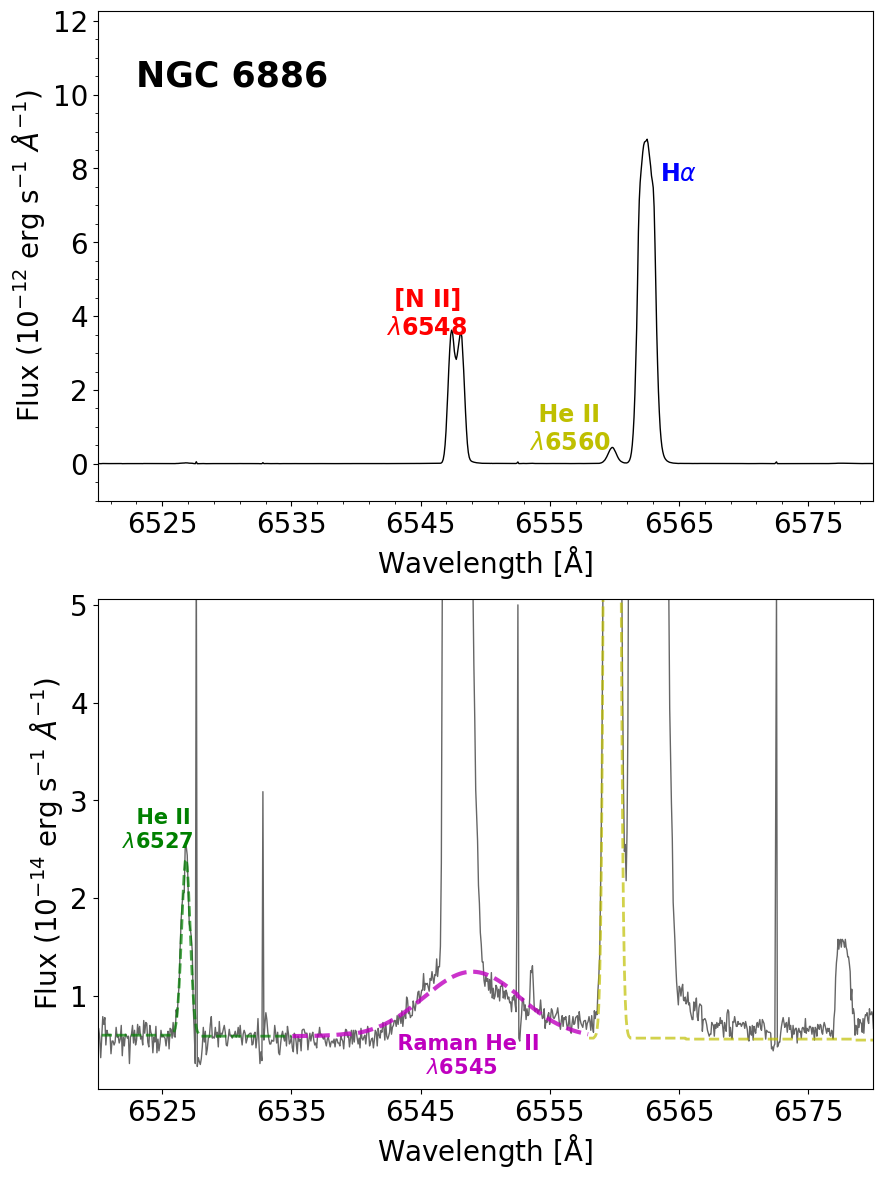

In [10]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'NGC6886'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] +globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] +globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)

F_6560 =4.28E-13
lam_6560 =6559.83
FWHM_6560 = 32.67140034
F_6560_sig = FWHM_to_sig(FWHM_6560,lam_6560)

F_6545_con_1 =5.48E-15 *1e12
F_6545_con_4 = 6.69E-15 *1e12

lam_6545_con_1 = 6549.4
lam_6545_con_4 =6549

FWHM_6545_con_1 = 453.6797002
FWHM_6545_con_4 = 406.4541184

F_6545_con_1_sigma = FWHM_to_sig(FWHM_6545_con_1,lam_6545_con_1)
F_6545_con_4_sigma = FWHM_to_sig(FWHM_6545_con_4,lam_6545_con_4)

fit_6545_con_1 = Data_R_Flux(F_6545_con_1,globals()[f'Model_lam_{name}'],lam_6545_con_1,F_6545_con_1_sigma, globals()[f'F_c_{name}'])
fit_6545_con_4 = Data_R_Flux(F_6545_con_4,globals()[f'Model_lam_{name}'],lam_6545_con_4,F_6545_con_4_sigma, globals()[f'F_c_{name}'])

# x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]
# plt.plot(globals()[f'Model_lam_{name}'],fit_6545_con_4,'m--',alpha=0.4,lw=3)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(0.9),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.75),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

# x_p = np.argmax(globals()[f'F_6584_1_{name}'])
# y_label = globals()[f'F_6584_1_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')

lam_0_6527 = 6527.1
lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)
print()

Fc = globals()[f'F_c_{name}'].mean()
# plt.vlines(lam_6560,-10,100,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,-10,100,colors='royalblue',linestyles='-.')
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=20)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-1,globals()[f'F_6563_{name}'].max()*1.2)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.0,'NGC 6886',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.7,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=2)

x_6545= np.where((globals()[f'Model_lam_{name}'] <= 6558)&(globals()[f'Model_lam_{name}'] >= 6535))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545],fit_6545_con_4[x_6545]*factor,'m--',alpha=0.8,lw=3)


# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.8,lw=1)


x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')

x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')



# Noise_level =globals()[f'F_c_{name}'] + (2.1e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=20)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=20)
plt.ylim(1e-3,3*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)



RCE_1 = 1.24 * (F_6545_con_1_sigma*F_6545_con_1/1e12) / (F_6560*F_6560_sig )


print('Condition 1 RCE of ratio is ',RCE_1)

RCE_4 = 1.24 * (F_6545_con_4_sigma*F_6545_con_4/1e12) / (F_6560*F_6560_sig )


print('Condition 4 RCE of ratio is ',RCE_4)
lam_0_6560= 6560.10
lam_0_6545 = 6544.7
del_lam = (lam_0_6560 - lam_0_6545)
print(del_lam)

Fc = globals()[f'F_c_{name}'].mean()
# plt.vlines(lam_6560,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
# plt.vlines(lam_6560 - del_lam,Fc*0.1,globals()[f'F_6527_{name}'].max()*3 + Fc*0.5,colors='royalblue',linestyles='-.')
plt.ylim(Fc*0.1,globals()[f'F_6527_{name}'].max()*2 + Fc*0.5)
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_R.png',bbox_inches='tight')

J 900

2.97
1.211506289308176


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0')])

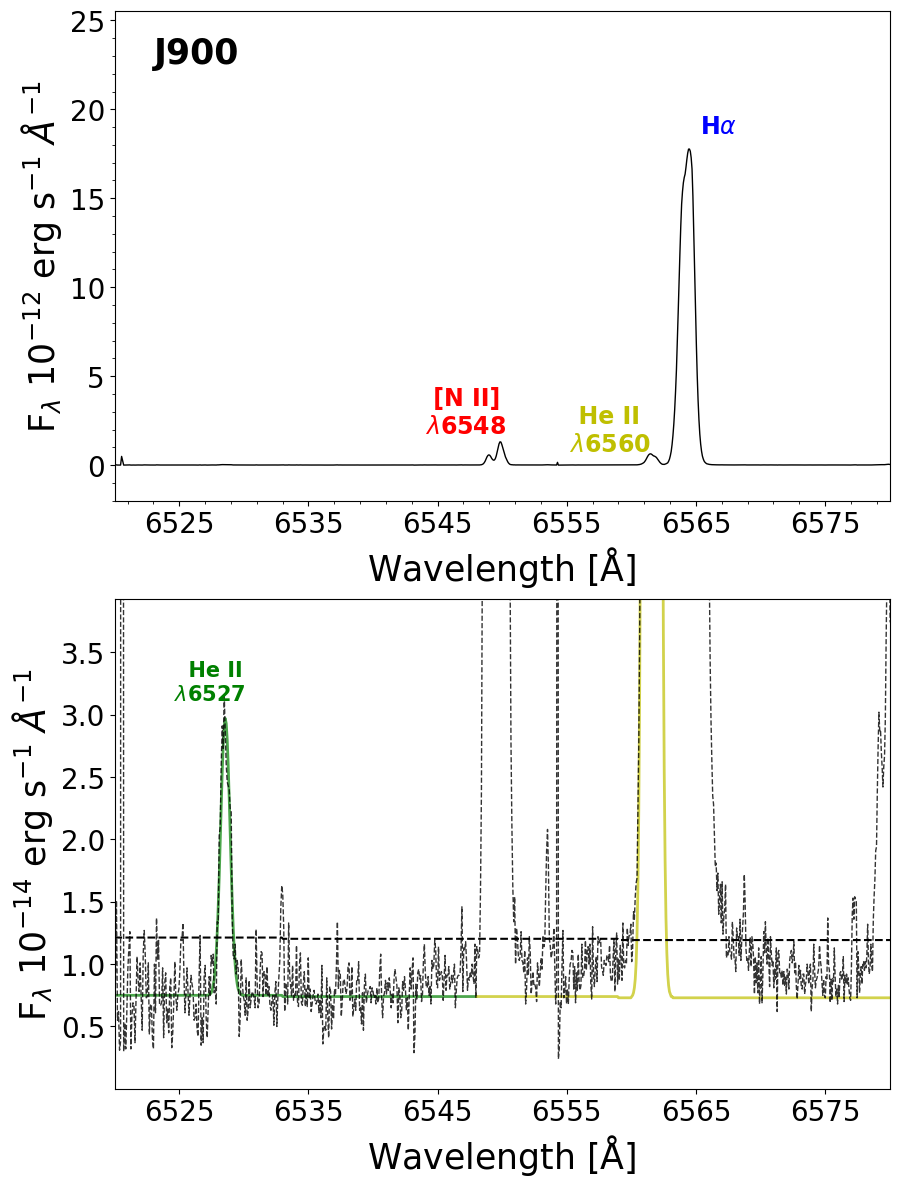

In [11]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'J900'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(3),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-2,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g-',alpha=0.7,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y-',alpha=0.7,lw=2)



Noise_level =globals()[f'F_c_{name}'] + (4.63e-15 * 1e12 *factor ) # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )
print(globals()[f'F_6527_{name}'][x_6527].max())
print(Noise_level[x_6527].mean())


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.8,lw=1)

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
plt.ylim(1e-3,2*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}_version_2.pdf',bbox_inches='tight')

M1-8

1.3
2.626771653543307


(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

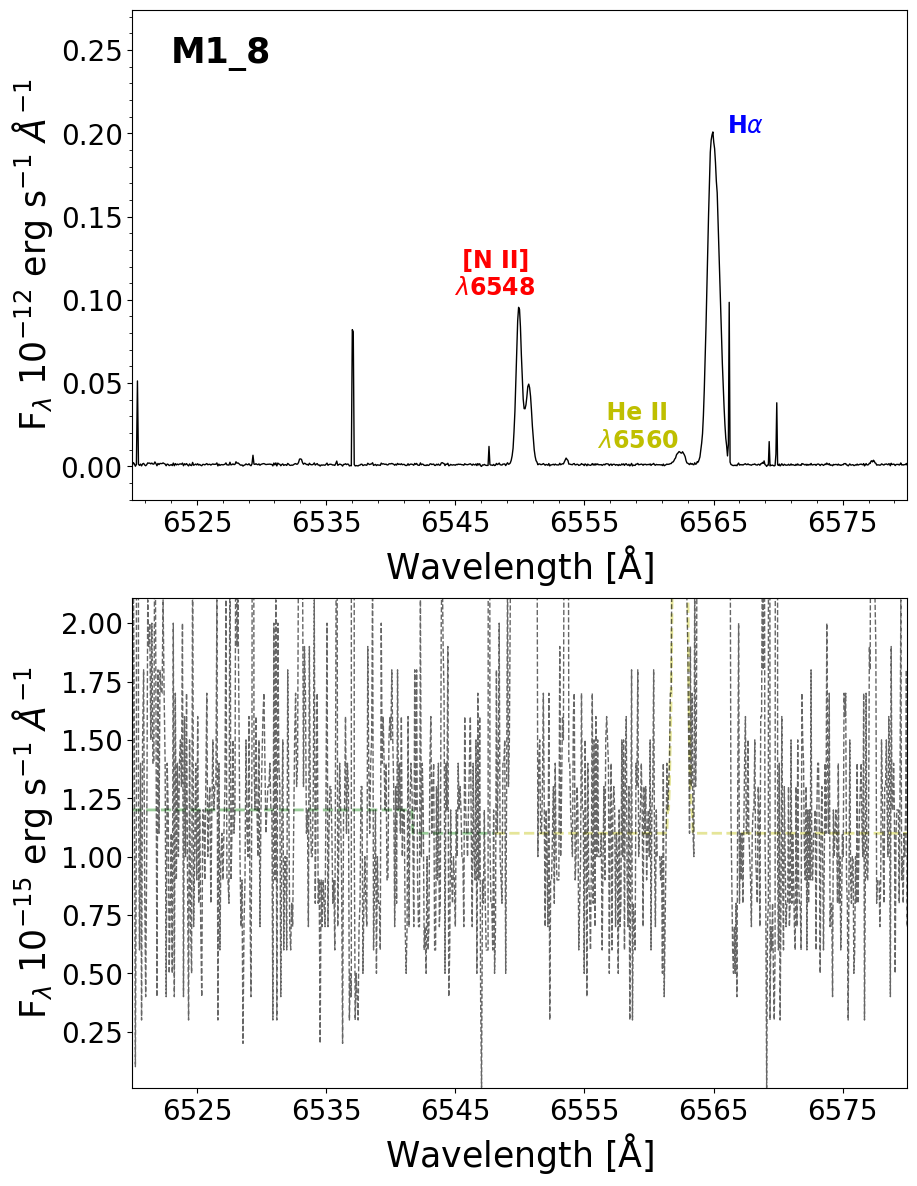

In [12]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'M1_8'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.1),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.02,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.4,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.4,lw=2)



Noise_level =globals()[f'F_c_{name}'] + (1.44e-15 * 1e12 *factor ) # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )
print(globals()[f'F_6527_{name}'][x_6527].max())
print(Noise_level[x_6527].mean())



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# x_p = np.argmax(globals()[f'F_6527_{name}'])
# y_label = globals()[f'F_6527_{name}'].max() /normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-15}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
plt.ylim(1e-2,10*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}_version_2.pdf',bbox_inches='tight')

NGC 2346

4.75
5.213


(array([1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

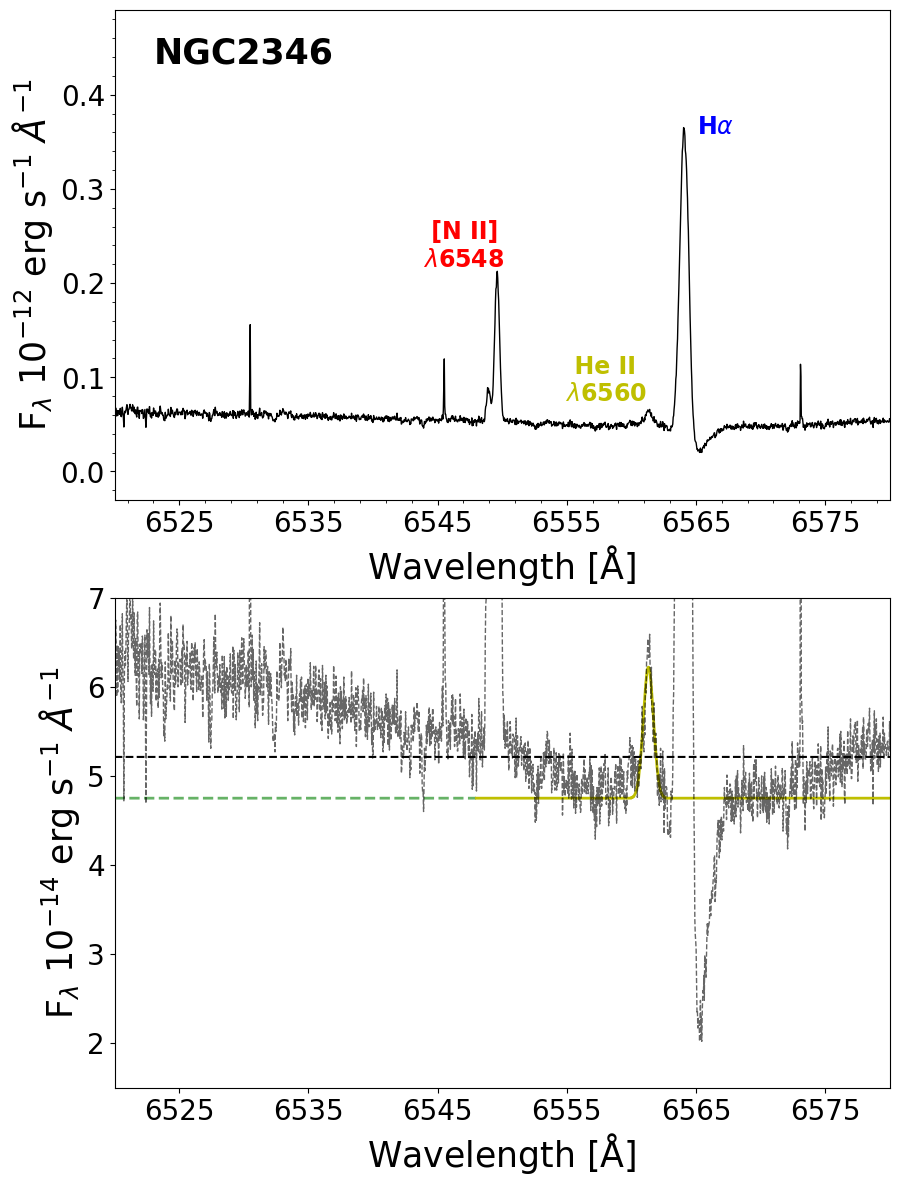

In [13]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'NGC2346'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(2.5),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.03,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.6,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y-',alpha=1,lw=2)



Noise_level =globals()[f'F_c_{name}'] + (4.63e-15 * 1e12 *factor ) # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )

print(globals()[f'F_6527_{name}'][x_6527].max())
print(Noise_level[x_6527].mean())


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# x_p = np.argmax(globals()[f'F_6527_{name}'])
# y_label = globals()[f'F_6527_{name}'].max() /normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
plt.ylim(1.5,7)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5.pdf',bbox_inches='tight')

NGC2392

5.7299999999999995
6.157204724409448


(array([ 5.,  6.,  7.,  8.,  9., 10.]),
 [Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10')])

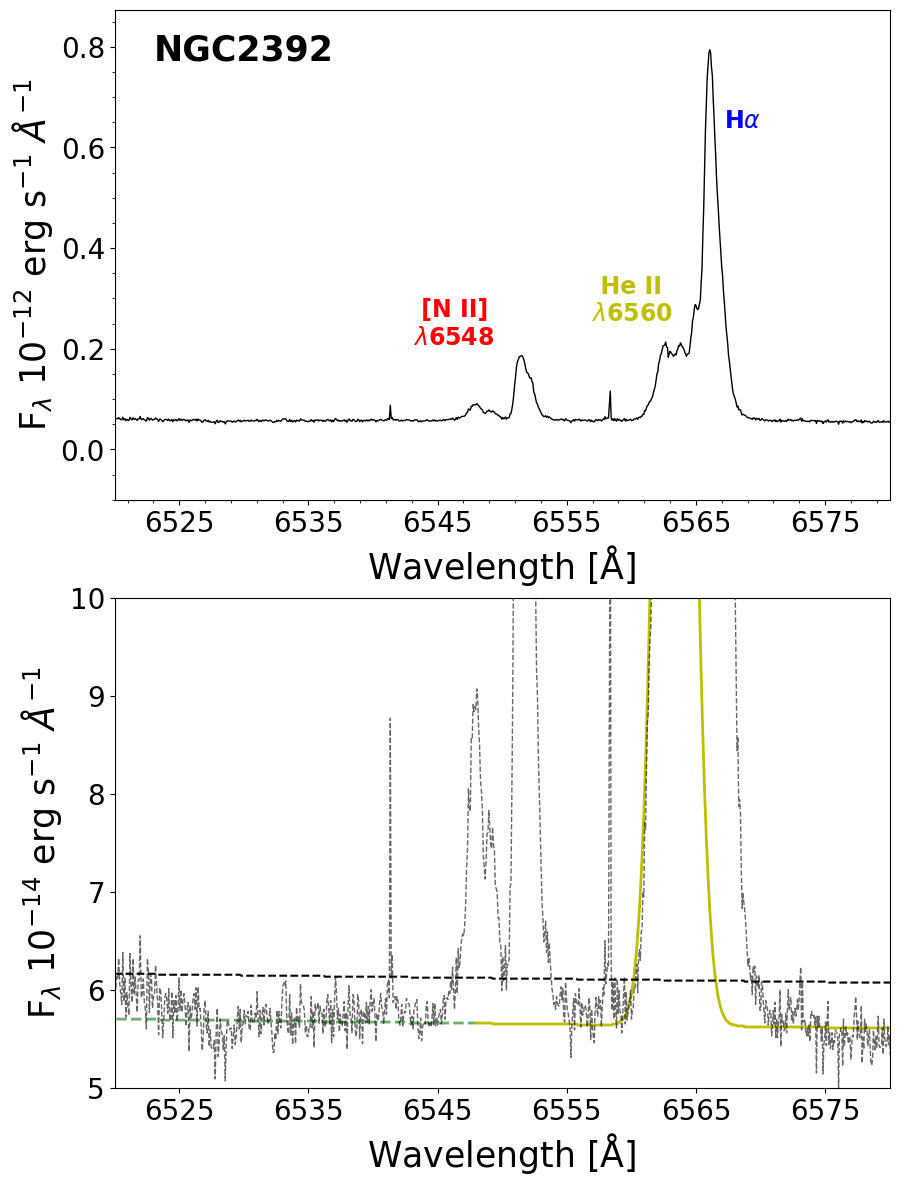

In [14]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'NGC2392'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(2.5),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.1,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.6,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y-',alpha=1,lw=2)



Noise_level =globals()[f'F_c_{name}'] + (4.63e-15 * 1e12 *factor ) # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )
print(globals()[f'F_6527_{name}'][x_6527].max())
print(Noise_level[x_6527].mean())
# print(globals()[f'F_6527_{name}'][x_6527].max())

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# x_p = np.argmax(globals()[f'F_6527_{name}'])
# y_label = globals()[f'F_6527_{name}'].max() /normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
plt.ylim(5,10)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5.pdf',bbox_inches='tight')

NGC 3242

0.4405354330708662
0.75


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

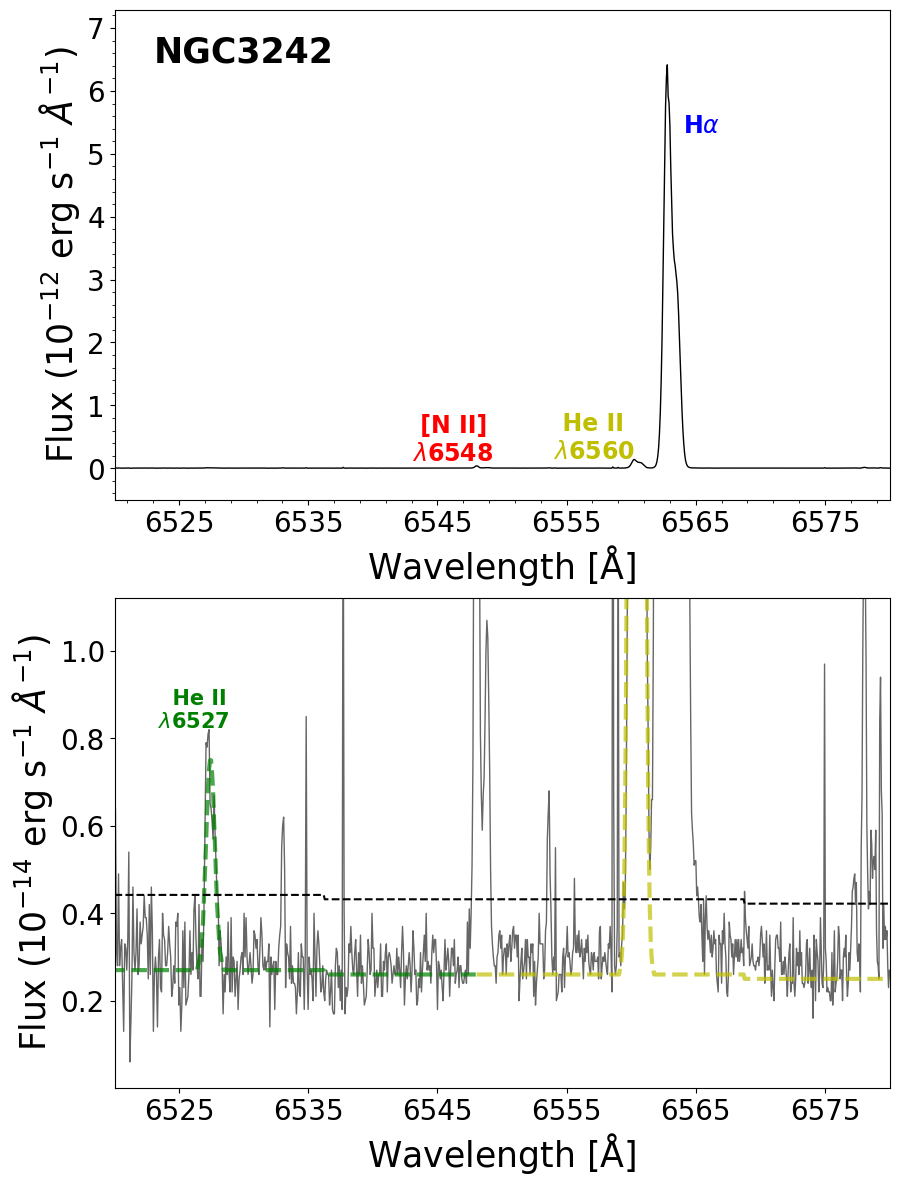

In [15]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'NGC3242'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(3),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.5,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.7,lw=3)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (1.72e-15 * 1e12 *factor ) # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )

print(Noise_level[x_6527].mean())
print(globals()[f'F_6527_{name}'][x_6527].max())

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.1),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(1e-3,2*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Re_BOES_{name}_He1',bbox_inches='tight')

Hen2 - 447

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0')])

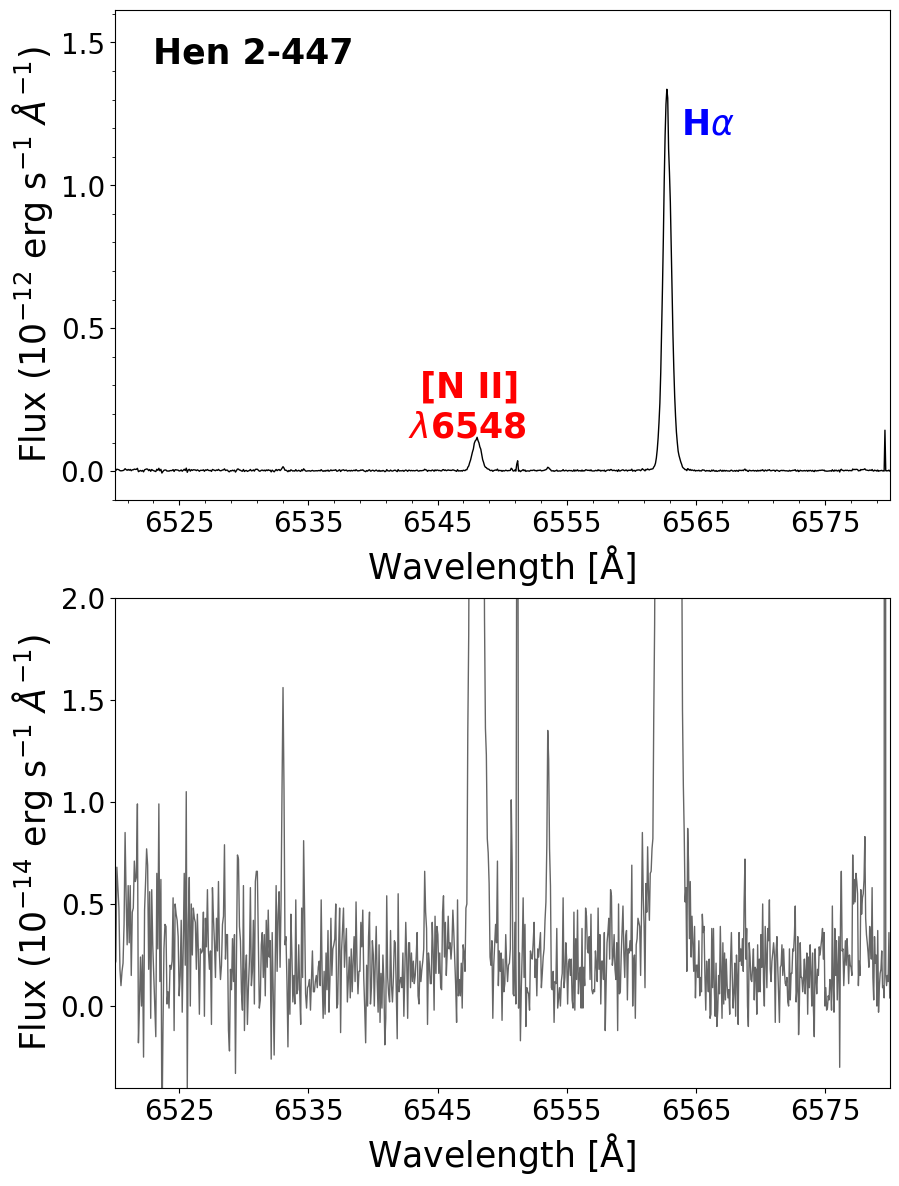

In [16]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'Hen2_447'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


# x_p = np.argmax(globals()[f'F_6560_{name}'])
# y_label = globals()[f'F_6560_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=25,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(3),' [N II]\n$\lambda$6548',size=25,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.1,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
plt.yticks([0.0,0.5,1.0,1.5],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,'Hen 2-447',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.4,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.4,lw=2)



# Noise_level =globals()[f'F_c_{name}'] + (6.06e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )
# print(Noise_level)
# print(globals()[f'F_6527_{name}'][x_6527].max())


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# x_p = np.argmax(globals()[f'F_6527_{name}'])
# y_label = globals()[f'F_6527_{name}'].max() /normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(-0.4,2.0)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Fig3_N.png',bbox_inches='tight')

H4-1

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

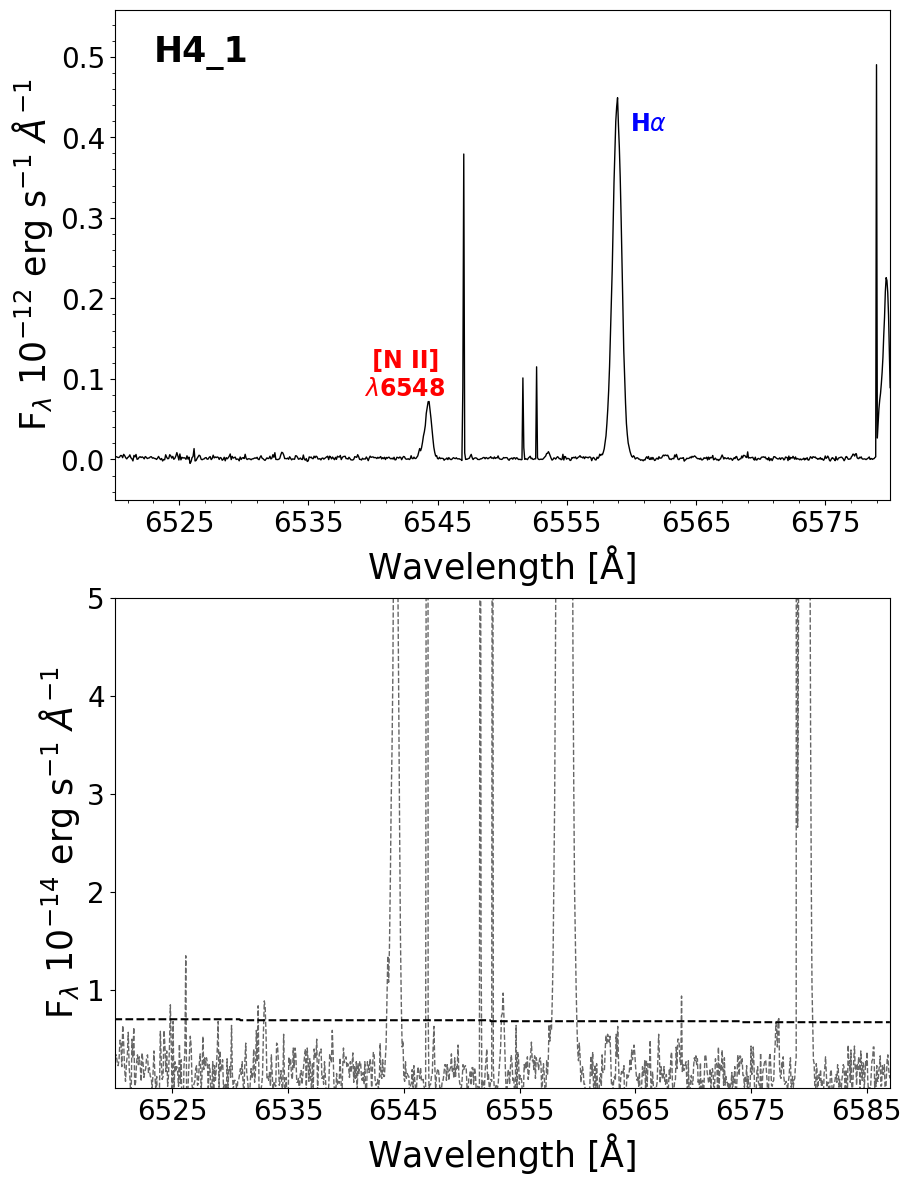

In [17]:
fig = plt.figure(1,figsize=(10,14))


plt.subplot(211)
name = 'H4_1'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


# x_p = np.argmax(globals()[f'F_6560_{name}'])
# y_label = globals()[f'F_6560_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.1),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.05,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.4,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.4,lw=2)



Noise_level =globals()[f'F_c_{name}'] + (5.33e-15 * 1e12 *factor ) # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# x_p = np.argmax(globals()[f'F_6527_{name}'])
# y_label = globals()[f'F_6527_{name}'].max() /normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_min,x_max = 6520,6587
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6595,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'F$_{\lambda}$ $10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
plt.ylim(0.005,5)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5.pdf',bbox_inches='tight')

Hu 2-1

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0')])

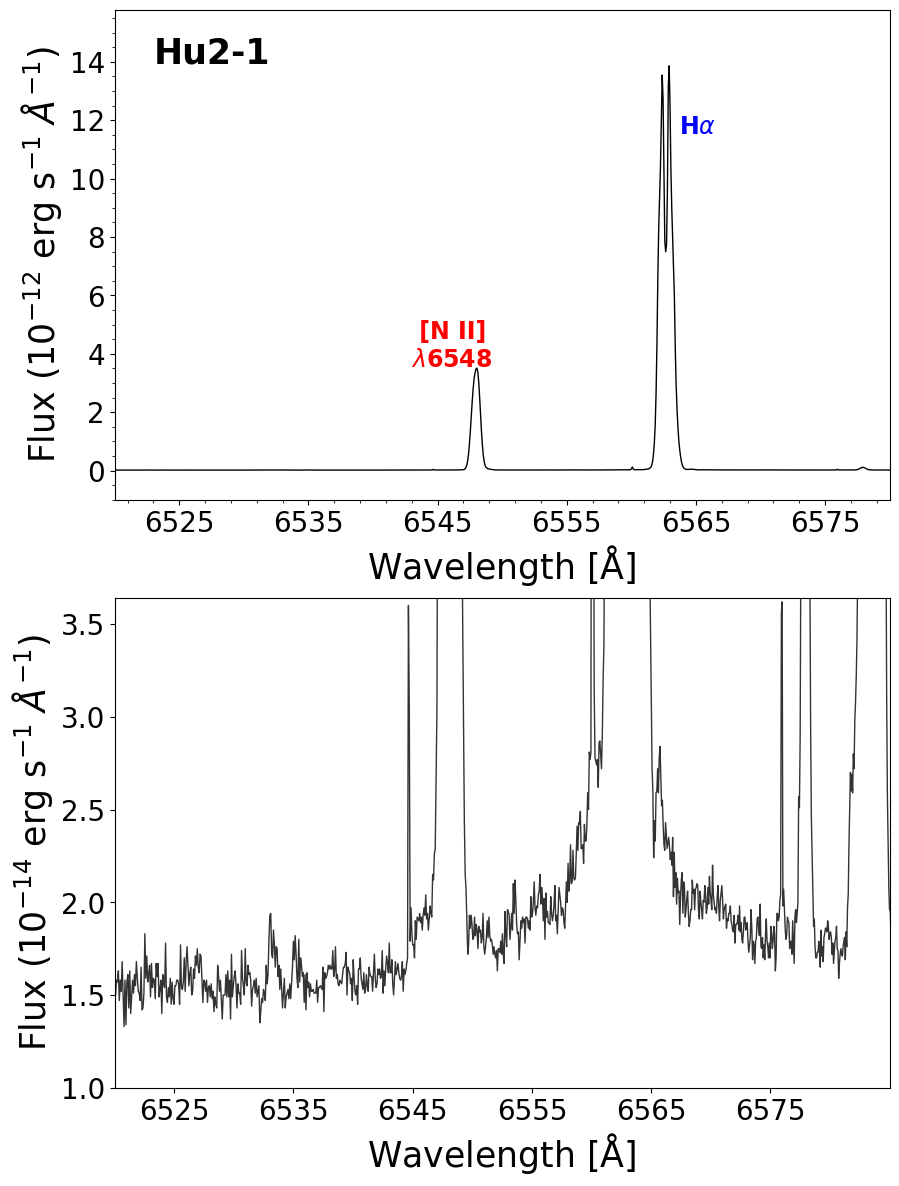

In [18]:
fig = plt.figure(1,figsize=(10,14))

plt.subplot(211)
name = 'Hu2_1'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


# x_p = np.argmax(globals()[f'F_6560_{name}'])
# y_label = globals()[f'F_6560_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.1),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-1,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'Hu2-1',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g-',alpha=0.7,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y-',alpha=0.7,lw=2)



# Noise_level =globals()[f'F_c_{name}'] + (2.84e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.8,lw=1)

plt.xlim(x_min,x_max)

F_6560 =9.65E-14 * 1e12* factor
lam_6560 =6527.07
F_6560_sig = 0.06
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6560,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'], fit_6527,'g--',alpha=0.4)



x_min,x_max = 6520,6585
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)',fontsize=25)
plt.ylim(1.0,3*globals()[f'F_6563_{name}'].max()/1000)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Re_BOES_{name}_WO',bbox_inches='tight')